In [4]:
#----------------------------------
# Author : Daniel Jiménez M
# Dataset: Covid Colombia
# Date : 2020-05-25
#-----------------------------------
import pandas as pd
import numpy as np
from sklearn.isotonic import IsotonicRegression
from sklearn.linear_model import LinearRegression
import datetime
import warnings
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from sklearn.utils import check_random_state
warnings.filterwarnings("ignore")

In [2]:
covid = pd.read_csv('../Desktop/coronavirus.colombia.csv')
covid.head()

,ID de caso,Fecha de notificación,Codigo DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,Italia,2020-02-27T00:00:00.000,- -,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,España,2020-03-04T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,España,2020-02-29T00:00:00.000,- -,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,Colombia,2020-03-06T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,Colombia,2020-03-08T00:00:00.000,- -,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000


In [3]:
covid['Fecha de notificación'] = pd.to_datetime(covid['Fecha de notificación'])

In [5]:
## Create Week
covid['week'] = covid['Fecha de notificación'].dt.week

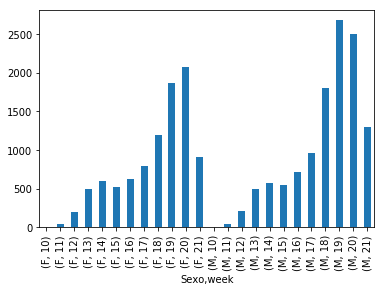

In [19]:
df = covid.groupby(['Sexo','week']).size()
df.plot.bar()

In [70]:
data = covid.groupby(['week']).size().reset_index(name="Total")
data.head()

,week,Total
0,10,5
1,11,78
2,12,418
3,13,1000
4,14,1178


In [75]:
n=len(data)
x= data['week']
y=data['Total']
ir = IsotonicRegression()
y_ = ir.fit_transform(x, y)

In [76]:
lr = LinearRegression()
lr.fit(x[:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

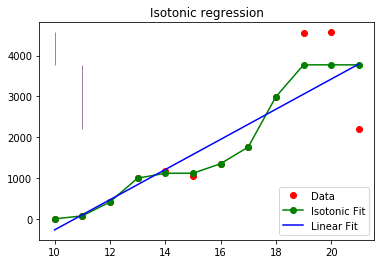

In [77]:
segments = [[[i, y[i]], [i, y_[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure()
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, y_, 'g.-', markersize=12)
plt.plot(x, lr.predict(x[:, np.newaxis]), 'b-')
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit', 'Linear Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()